<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

#### Import the required libraries

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Read the data

Load the csv file and print the first five observations.

In [4]:
df = pd.read_csv('rainfall_prediction.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'rainfall_prediction.csv'

In [ ]:
df.head()

**The data definition is as follows:** <br>

**Obs_Id:** Observation Id

**Rainfall:** Rainfall recorded in a day (in mm) 

**Evaporation:** Number of field goals made 

**Sunshine:** Number of hours of bright sunshine per day

**Temp:** Temperature in degree C

**Wind_Speed:** Average speed of the wind in km/hour

**Humidity:** Humidity in percentage (%)

**Pressure:** Atmospheric pressure in hpa (hecto Pascals)

**Rain Tomorrow:** Whether it will rain or not(0 = No, it won't rain tomorrow, 1 = Yes, it will rain tomorrow) (target/dependent variable)

Our objective is to predict whether it will rain tomorrow or not.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify and remove the variables in the data which are insignificant for the classification analysis</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.corr()

In [ ]:
df = df.drop('Obs_Id',axis=1)

In [ ]:
df.head()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there any record that is recorded more than once? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
duplicates = df[df.duplicated(subset=['Rainfall','Evaporation','Sunshine','Temp','Wind_Speed','Humidity','Pressure','RainTomorrow'])]

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
df.head()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any outliers present in the data? If yes, remove such observations using the quartiles of the variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
data_num = df.select_dtypes(include=np.number)
num_col = data_num.columns.to_list()

In [ ]:
for i in num_col:
    sns.boxplot(y=df[i])
    plt.show()

In [5]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr

NameError: name 'df' is not defined

In [6]:
df_final = df[~((df>ul)|(df<ll)).any(axis=1)]

NameError: name 'df' is not defined

In [ ]:
df_final.shape

In [7]:
df.shape

NameError: name 'df' is not defined

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is scaling required for the KNN algorithm? If yes, scale the data such that the range of each variable will be between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [21]:
X = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.80,random_state=1)

In [23]:
xtrain_sc = SS.fit_transform(xtrain)
xtest_sc = SS.transform(xtest)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a 7-NN model on 70% of the data using the 'Chebyshev' distance and find its accuracy 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=7,metrics='chebyshev')

In [30]:
model = KN.fit(xtrain_sc,ytrain)
model_pred = model.predict(xtest_sc)

In [31]:
print(classification_report(ytest,model_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       236
           1       0.78      0.44      0.56        64

    accuracy                           0.85       300
   macro avg       0.82      0.70      0.74       300
weighted avg       0.85      0.85      0.84       300



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the best value of 'K' for the KNN model from the given list of values (use 5-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

K = [3, 5, 7, 9, 11, 13]

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameters = {'n_neighbors':[3, 5, 7, 9, 11, 13]}
kn11 = KNeighborsClassifier()
knncv  = GridSearchCV(kn11,parameters,cv=5,scoring='accuracy')
knncv.fit(xtrain_sc,ytrain)
knncv.best_params_

{'n_neighbors': 13}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a naive bayes model on 70% of the original data and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB

In [35]:
X = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.80,random_state=1)
GM = GaussianNB()
GModel = GM.fit(xtrain,ytrain)
ypred_GM = GModel.predict(xtest)
print(confusion_matrix(ytest,ypred_GM))
print(accuracy_score(ytest,ypred_GM))
print('GM training accuracy',GModel.score(xtrain,ytrain))
print('GM test accuracy',GModel.score(xtest,ytest))
print(classification_report(ytest,ypred_GM))

[[216  20]
 [ 31  33]]
0.83
GM training accuracy 0.8366666666666667
GM test accuracy 0.83
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       236
           1       0.62      0.52      0.56        64

    accuracy                           0.83       300
   macro avg       0.75      0.72      0.73       300
weighted avg       0.82      0.83      0.82       300



0.834083686440678


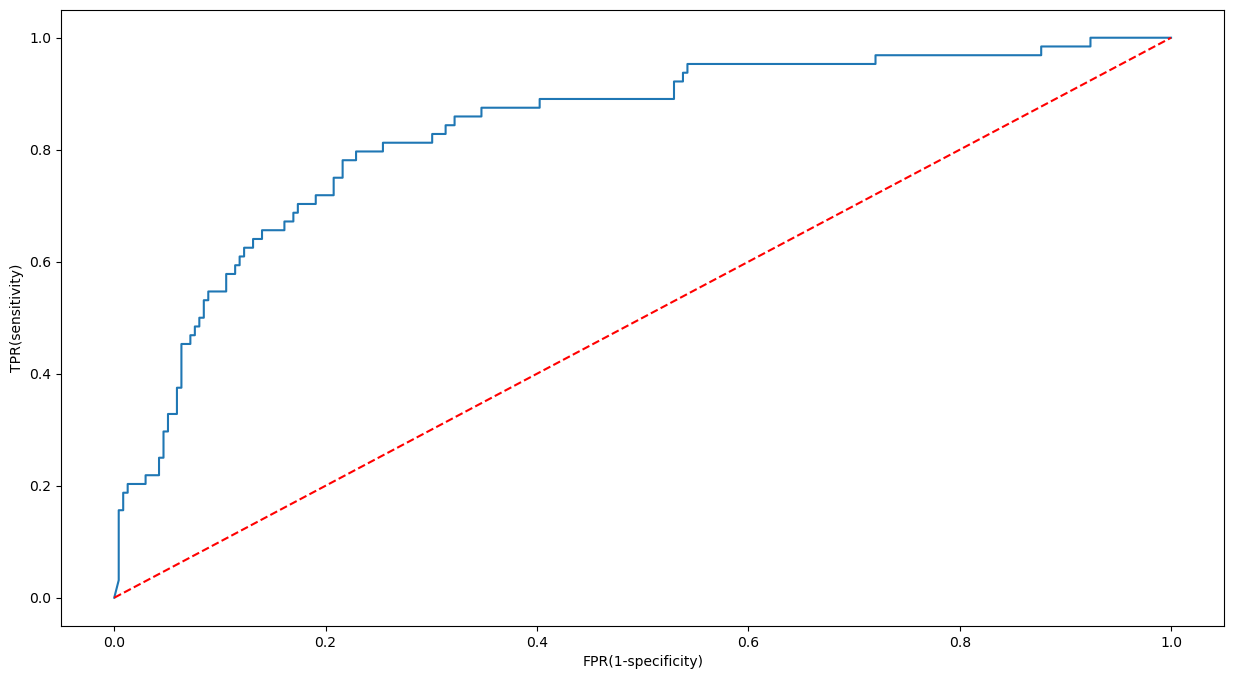

In [37]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred_prob_lr = GModel.predict_proba(xtest)
fpr,tpr,threshold=roc_curve(ytest,ypred_prob_lr[:,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR(1-specificity)')
plt.ylabel('TPR(sensitivity)')
plt.plot([0,1],[0,1],'r--')
print(roc_auc_score(ytest,ypred_prob_lr[:,1]))
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which distance metric among 'manhattan', 'euclidean' and 'chebyshev' is suitable for the given dataset? (consider K = 19)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters = {'n_neighbors':[19],'metric':['manhattan','euclidean','chebyshev']}
kn11 = KNeighborsClassifier()
knncv  = GridSearchCV(kn11,parameters,cv=5,scoring='accuracy')
knncv.fit(xtrain_sc,ytrain)
knncv.best_params_

{'metric': 'euclidean', 'n_neighbors': 19}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the euclidean distance between the first observation of the dataframe 'X_test_scaled' and its five neighboring points in the train set (use for loop)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the parameters obtained in Q8 to build the KNN model, and find the number of false predictions using the test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=19, p=2)
model = KN.fit(xtrain_sc,ytrain)
model_pred = model.predict(xtest_sc)
print(confusion_matrix(ytest,model_pred))

[[226  10]
 [ 40  24]]


In [43]:
#The number of false predictions is 50